In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

In [3]:
df <- read_csv('percent_swapped.csv')

head(df, 2)

Parsed with column specification:
cols(
  density = col_double(),
  multiplier = col_double(),
  percent_swapped = col_double(),
  num_attempts = col_double(),
  network_type = col_character()
)


density,multiplier,percent_swapped,num_attempts,network_type
0.001,0,0,0,Erdős-Rényi
0.001,0,0,0,Barabási–Albert


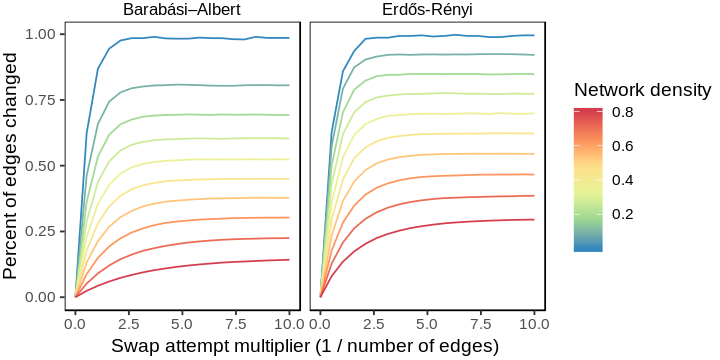

In [4]:
options(repr.plot.width=6, repr.plot.height=3)

g <- (
    ggplot(df, aes(x = multiplier, y = percent_swapped, group = density, color = density))
    + geom_line()
    + facet_wrap(vars(network_type))
    + labs(color = 'Network density')
    + xlab("Swap attempt multiplier (1 / number of edges)")
    + ylab('Percent of edges changed')
    + scale_color_distiller(type = 'div', palette = 'Spectral')
    + theme_zietzm()
)

ggsave('../../img/6_xswap_percent_swapped_iterations/lines_continuous.png', g,
       width = 6, height = 3, dpi = 500)

g